## Imports

In [1]:
import my_utils
import numpy as np
import matplotlib.pyplot as plt

## Preprocess train data and save it

In [ ]:
patients = utils.get_patients_train()

In [ ]:
T1_samples, T2_samples, T1_labels, T2_labels = utils.load_data(mode='train')

In [ ]:
print('T1 samples shape:', T1_samples[1].shape)
print('T2 samples shape:', T2_samples[1].shape)
print('T1 labels shape:', T1_labels[1].shape)
print('T2 labels shape:', T2_labels[1].shape)

In [ ]:
# Plot a sample from T1_samples
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(T1_samples[1][16], cmap='gray')
plt.title('T1 sample')
plt.subplot(1, 2, 2)
plt.imshow(T1_labels[1][16], cmap='gray')
plt.title('T1 label')
plt.show()

In [ ]:
# Create a deep copy of the original data
T1_samples_copy = T1_samples.copy()
T2_samples_copy = T2_samples.copy()
T1_labels_copy = T1_labels.copy()
T2_labels_copy = T2_labels.copy()

# Check that the copy address is different from the original
print('T1 samples address:', id(T1_samples))
print('T1 samples copy address:', id(T1_samples_copy))

In [ ]:
# Change the keys of the dictionary from numpy.int64 to str
T1_samples_copy = {str(k): v for k, v in T1_samples_copy.items()}
T2_samples_copy = {str(k): v for k, v in T2_samples_copy.items()}
T1_labels_copy = {str(k): v for k, v in T1_labels_copy.items()}
T2_labels_copy = {str(k): v for k, v in T2_labels_copy.items()}

# Check that the keys are now strings
print('T1 samples keys:', list(T1_samples_copy.keys())[:5])
print('T2 samples keys:', list(T2_samples_copy.keys())[:5])
print('T1 labels keys:', list(T1_labels_copy.keys())[:5])
print('T2 labels keys:', list(T2_labels_copy.keys())[:5])

In [ ]:
# Save the data in a .npy file
np.save('data/train/T1_samples_train.npy', T1_samples_copy)
np.save('data/train/T2_samples_train.npy', T2_samples_copy)
np.save('data/train/T1_labels_train.npy', T1_labels_copy)
np.save('data/train/T2_labels_train.npy', T2_labels_copy)

## Load train data

In [2]:
# Load the data from the .npy file
T1_samples_loaded = np.load('data/train/T1_samples_train.npy', allow_pickle=True)
T2_samples_loaded = np.load('data/train/T2_samples_train.npy', allow_pickle=True)
T1_labels_loaded = np.load('data/train/T1_labels_train.npy', allow_pickle=True)
T2_labels_loaded = np.load('data/train/T2_labels_train.npy', allow_pickle=True)

In [3]:
type(T1_samples_loaded), type(T2_samples_loaded), type(T1_labels_loaded), type(T2_labels_loaded)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [4]:
# Transform the loaded data back into a dictionary
T1_samples_loaded = T1_samples_loaded.item()
T2_samples_loaded = T2_samples_loaded.item()
T1_labels_loaded = T1_labels_loaded.item()
T2_labels_loaded = T2_labels_loaded.item()

In [5]:
print('T1 samples shape:', T1_samples_loaded['1'].shape)
print('T2 samples shape:', T2_samples_loaded['1'].shape)
print('T1 labels shape:', T1_labels_loaded['1'].shape)
print('T2 labels shape:', T2_labels_loaded['1'].shape)

T1 samples shape: (32, 272, 272)
T2 samples shape: (32, 272, 272)
T1 labels shape: (32, 272, 272)
T2 labels shape: (32, 272, 272)


In [6]:
type(T1_samples_loaded), type(T2_samples_loaded), type(T1_labels_loaded), type(T2_labels_loaded)

(dict, dict, dict, dict)

In [7]:
T1_samples_loaded.keys(), T2_samples_loaded.keys(), T1_labels_loaded.keys(), T2_labels_loaded.keys()

(dict_keys(['1', '2', '3', '5', '8', '10', '13', '15', '19', '20', '21', '22', '31', '32', '33', '34', '36', '37', '38', '39']),
 dict_keys(['1', '2', '3', '5', '8', '10', '13', '15', '19', '20', '21', '22', '31', '32', '33', '34', '36', '37', '38', '39']),
 dict_keys(['1', '2', '3', '5', '8', '10', '13', '15', '19', '20', '21', '22', '31', '32', '33', '34', '36', '37', '38', '39']),
 dict_keys(['1', '2', '3', '5', '8', '10', '13', '15', '19', '20', '21', '22', '31', '32', '33', '34', '36', '37', '38', '39']))

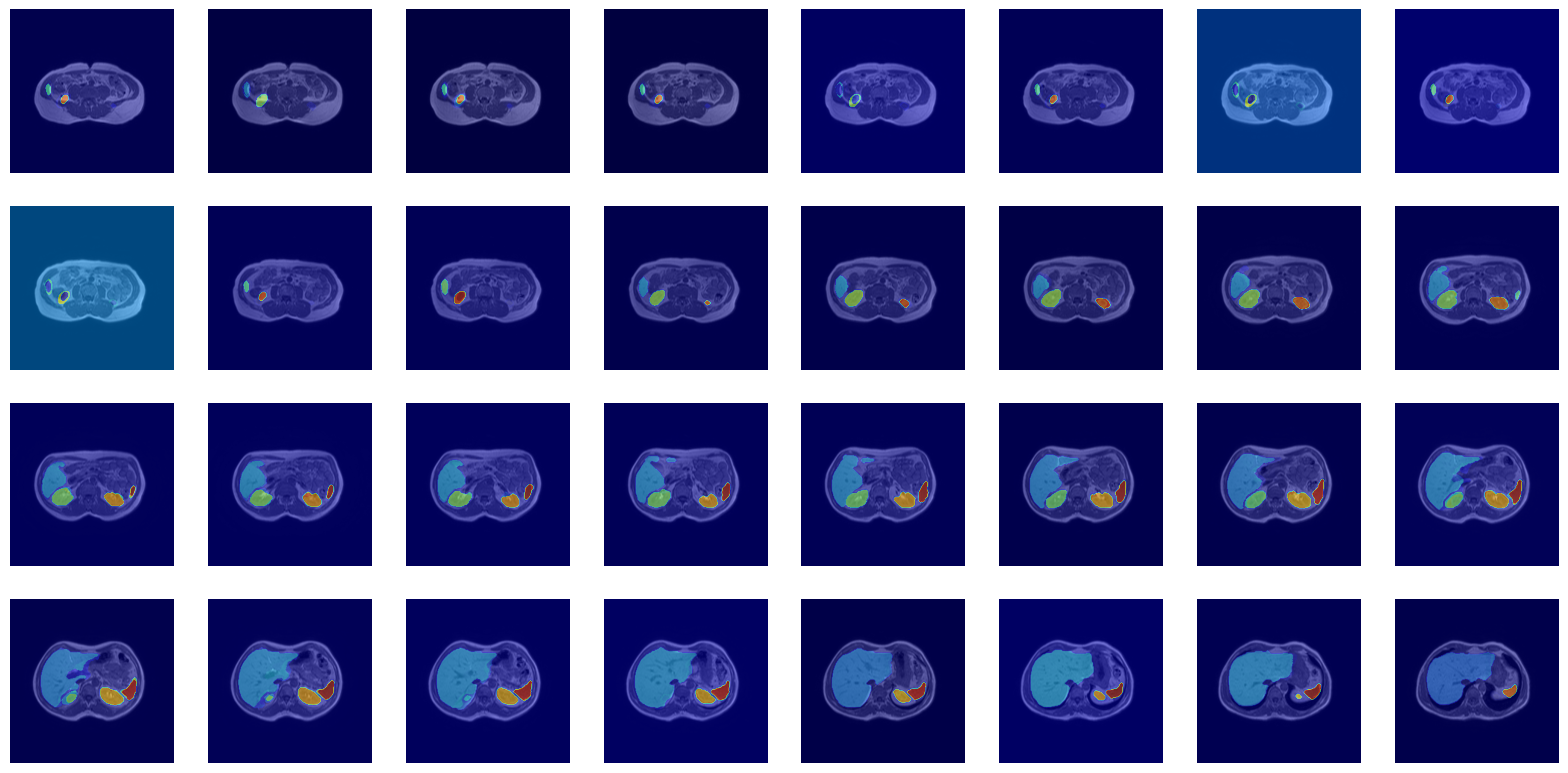

In [8]:
# Plot the first volume of T1_samples_loaded, meaning there are 32 subplots
# Plot the image together with its label
plt.figure(figsize=(20, 20))
for i in range(32):
    plt.subplot(8, 8, i+1)
    plt.imshow(T1_samples_loaded['1'][i], cmap='gray')
    plt.imshow(T1_labels_loaded['1'][i], cmap='jet', alpha=0.5)
    plt.axis('off')
plt.show()

## Preprocess test data and save it

In [2]:
patients_test = utils.get_patients_test()
patients_test

array([ 4,  6,  7,  9, 11, 12, 14, 16, 17, 18, 23, 24, 25, 26, 27, 28, 29,
       30, 35, 40])

In [3]:
T1_samples, T2_samples, _, _ = utils.load_data(mode='test')

Loading T1 data...
- Loading image volume for patient 4...
    Image volume shape: (26, 256, 256)
    Voxel dimensions: [1.89453125 1.89453125 9.        ]
- Loading image volume for patient 6...
    Image volume shape: (26, 256, 256)
    Voxel dimensions: [1.73828125 1.73828125 9.        ]
- Loading image volume for patient 7...
    Image volume shape: (26, 288, 288)
    Voxel dimensions: [1.44097221 1.44097221 9.        ]
- Loading image volume for patient 9...
    Image volume shape: (32, 288, 288)
    Voxel dimensions: [1.44097221 1.44097221 6.        ]
- Loading image volume for patient 11...
    Image volume shape: (26, 256, 256)
    Voxel dimensions: [1.81640625 1.81640625 9.        ]
- Loading image volume for patient 12...
    Image volume shape: (40, 256, 256)
    Voxel dimensions: [1.89453125 1.89453125 5.5       ]
- Loading image volume for patient 14...
    Image volume shape: (30, 256, 256)
    Voxel dimensions: [1.23046875 1.23046875 9.        ]
- Loading image volume for

In [5]:
print('T1 samples shape:', T1_samples[4].shape)
print('T2 samples shape:', T2_samples[4].shape)

T1 samples shape: (32, 272, 272)
T2 samples shape: (32, 272, 272)


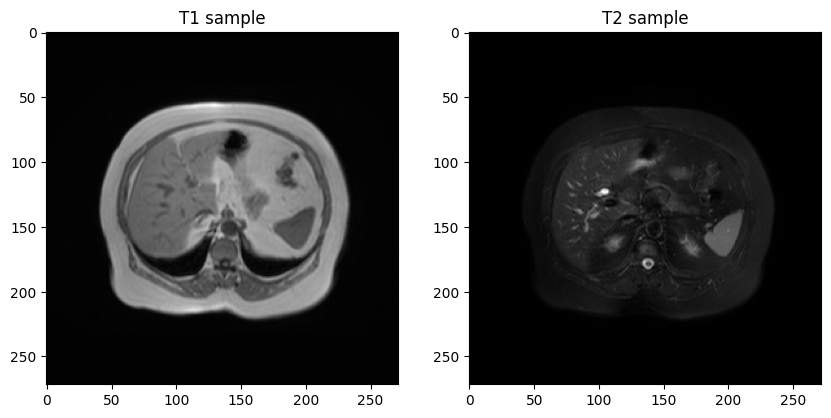

In [6]:
# Plot a sample from T1_samples and T2_samples
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(T1_samples[4][16], cmap='gray')
plt.title('T1 sample')
plt.subplot(1, 2, 2)
plt.imshow(T2_samples[4][16], cmap='gray')
plt.title('T2 sample')
plt.show()

In [7]:
# Create a deep copy of the original data
T1_samples_copy = T1_samples.copy()
T2_samples_copy = T2_samples.copy()

# Check that the copy address is different from the original
print('T1 samples address:', id(T1_samples))
print('T1 samples copy address:', id(T1_samples_copy))

T1 samples address: 140554368464896
T1 samples copy address: 140554115512192


In [8]:
# Change the keys of the dictionary from numpy.int64 to str
T1_samples_copy = {str(k): v for k, v in T1_samples_copy.items()}
T2_samples_copy = {str(k): v for k, v in T2_samples_copy.items()}

# Check that the keys are now strings
print('T1 samples keys:', list(T1_samples_copy.keys())[:5])
print('T2 samples keys:', list(T2_samples_copy.keys())[:5])

T1 samples keys: ['4', '6', '7', '9', '11']
T2 samples keys: ['4', '6', '7', '9', '11']


In [10]:
# Save the data in a .npy file
np.save('data/test/T1_samples_test.npy', T1_samples_copy)
np.save('data/test/T2_samples_test.npy', T2_samples_copy)

## Load the test data

In [11]:
# Load the data from the .npy file
T1_samples_loaded = np.load('data/test/T1_samples_test.npy', allow_pickle=True)
T2_samples_loaded = np.load('data/test/T2_samples_test.npy', allow_pickle=True)

In [12]:
type(T1_samples_loaded), type(T2_samples_loaded)

(numpy.ndarray, numpy.ndarray)

In [13]:
# Transform the loaded data back into a dictionary
T1_samples_loaded = T1_samples_loaded.item()
T2_samples_loaded = T2_samples_loaded.item()

In [15]:
print('T1 samples shape:', T1_samples_loaded['4'].shape)
print('T2 samples shape:', T2_samples_loaded['4'].shape)

T1 samples shape: (32, 272, 272)
T2 samples shape: (32, 272, 272)


In [16]:
type(T1_samples_loaded), type(T2_samples_loaded)

(dict, dict)

In [17]:
T1_samples_loaded.keys(), T2_samples_loaded.keys()

(dict_keys(['4', '6', '7', '9', '11', '12', '14', '16', '17', '18', '23', '24', '25', '26', '27', '28', '29', '30', '35', '40']),
 dict_keys(['4', '6', '7', '9', '11', '12', '14', '16', '17', '18', '23', '24', '25', '26', '27', '28', '29', '30', '35', '40']))

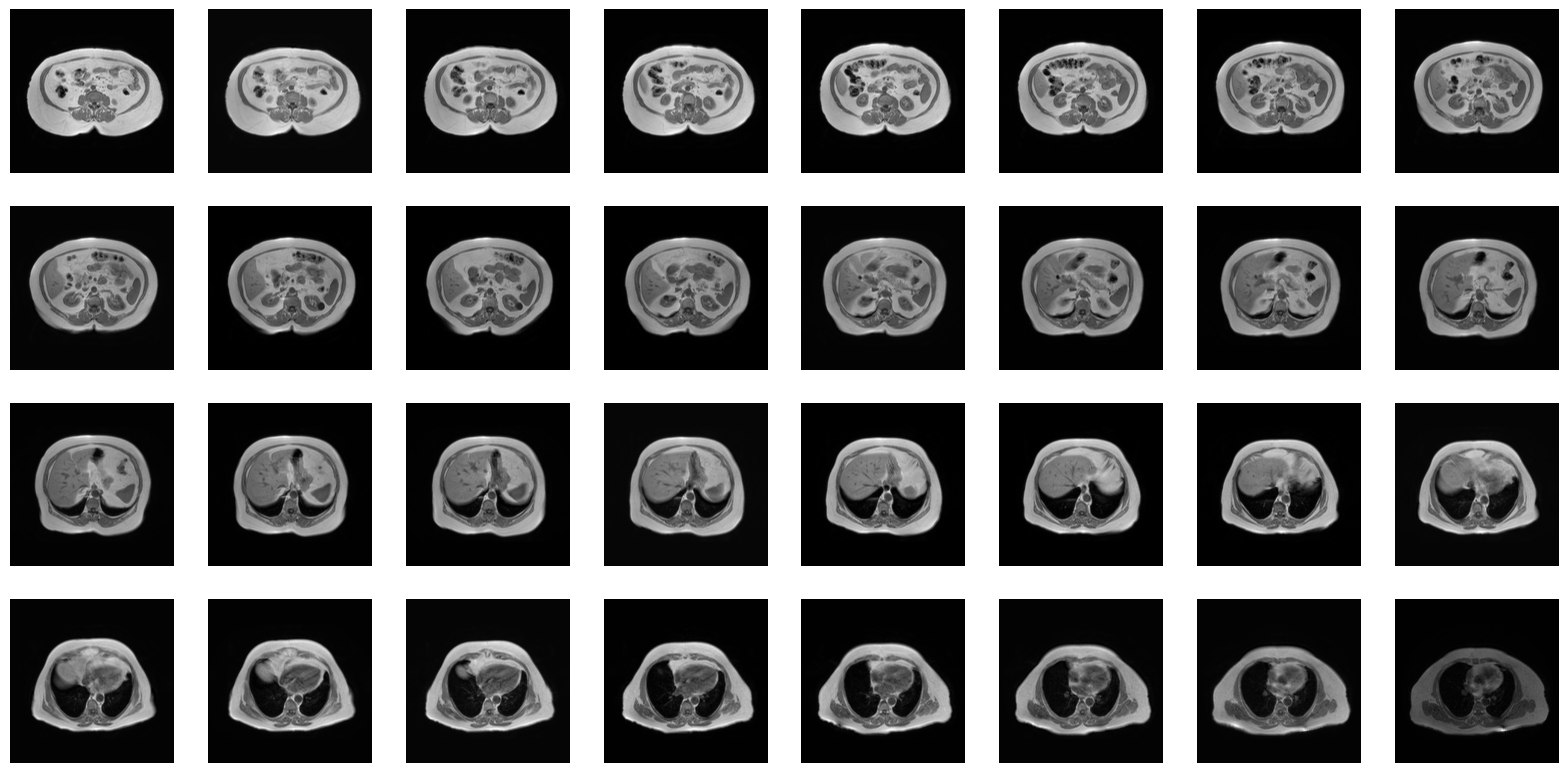

In [19]:
# Plot the entire first volume of T1_samples_loaded, meaning there are 32 subplots
plt.figure(figsize=(20, 20))
for i in range(32):
    plt.subplot(8, 8, i+1)
    plt.imshow(T1_samples_loaded['4'][i], cmap='gray')
    plt.axis('off')
plt.show()